In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df=pd.read_csv("drive/My Drive/Notebooks/data/healthcare_data.csv")

In [16]:
df.head()

,Patient_ID,Patient_Name,Age,Gender,Blood_Type,Diagnosis,Treatment_Cost
0,1001,John Smith,45,Male,A+,Hypertension,1200.50
1,1002,Jane Doe,62,Female,B-,Diabetes,800.75
2,1003,Robert Johnson,35,Male,O+,Cancer,5500.00
3,1004,Susan Wilson,78,Female,A-,Heart Disease,2700.25
4,1005,Michael Brown,55,Male,AB+,Asthma,400.00


In [4]:
df.shape

(50, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      50 non-null     int64  
 1   Patient_Name    50 non-null     object 
 2   Age             50 non-null     int64  
 3   Gender          50 non-null     object 
 4   Blood_Type      50 non-null     object 
 5   Diagnosis       50 non-null     object 
 6   Treatment_Cost  34 non-null     float64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


In [6]:
df.columns

Index(['Patient_ID', 'Patient_Name', 'Age', 'Gender', 'Blood_Type',
       'Diagnosis', 'Treatment_Cost'],
      dtype='object')

In [7]:
df['Treatment_Cost']=df['Treatment_Cost'].fillna(df.groupby('Diagnosis')['Treatment_Cost'].transform('mean'))
df

,Patient_ID,Patient_Name,Age,Gender,Blood_Type,Diagnosis,Treatment_Cost
0,1001,John Smith,45,Male,A+,Hypertension,1200.500000
1,1002,Jane Doe,62,Female,B-,Diabetes,800.750000
2,1003,Robert Johnson,35,Male,O+,Cancer,5500.000000
3,1004,Susan Wilson,78,Female,A-,Heart Disease,2700.250000
4,1005,Michael Brown,55,Male,AB+,Asthma,400.000000
5,1006,Lisa Miller,30,Female,B+,Hypertension,1234.416667
6,1007,James Davis,48,Male,O-,Diabetes,950.250000
7,1008,Karen Harris,65,Female,AB-,Cancer,6216.833333
8,1009,David Wilson,72,Male,A+,Heart Disease,3200.000000
9,1010,Linda Smith,42,Female,O+,Asthma,453.142857


There are 16 rows in Treatment_Cost column missing so I got mean for the column's missing rows by getting average cost of treatment cost by patients specific diagnoses.I used functions **fillna** and **transform** to replace rows with missing values in the Treatment Cost column.I **grouped** Diagnosis column and Treatment Cost columns using **groupby** function since I was basing mean value off of diagnosis and not blood type. Analysis of dataframe seems to show that blood type and treatment cost are not directly related.

Text(0.5, 1.0, 'Distribution of Patients Ages')

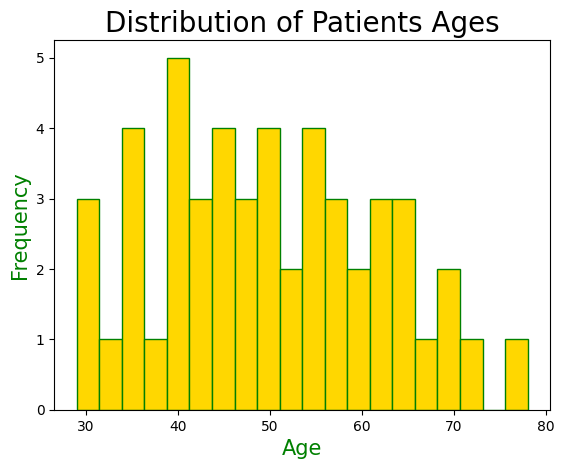

In [8]:
plt.hist(df['Age'], bins=20, color='gold',edgecolor='green')
plt.xlabel('Age',color='green',fontsize=15)
plt.ylabel('Frequency',color='green',fontsize=15)
plt.title('Distribution of Patients Ages', fontsize=20)

There are more patients in the **35 to 55** age range.

In [18]:
df['Gender'].value_counts().get('Male',0)/len(df['Gender'])*100

50.0

Male patients make up **50%** of patients in this dataframe.

In [19]:
df3=df['Diagnosis'].value_counts().get('Cancer',0)
df3

10

There are **10** patients with Cancer.

In [20]:
df[df['Age'] >=60]['Treatment_Cost'].mean()


3088.8263888888887

The average treatment cost for patients 60 and above is **$3089.** Twelve patients are **60 and above**, **5** patients suffer from **heart disease** which has second highest treatment cost next to **Cancer**, which **3 patients** in this age range had. In this particular age range **3/4ths** of the patients were being treated for diseases that cost more to treat.

In [21]:
btype=df.groupby('Blood_Type')['Treatment_Cost'].mean().reset_index()
btype

,Blood_Type,Treatment_Cost
0,A+,3299.489583
1,A-,1714.875000
2,AB+,2648.353741
3,AB-,2488.295238
4,B+,1014.230952
5,B-,1940.395238
6,O+,2986.340774
7,O-,1818.444444


Patients with A+ and O+ blood types pay more for treatment than other blood types. **Blood types B+ and A-** pay less for treatment than other blood types. This is not due to blood type though, but due to **particular diagnoses** patients in a particular blood type has. For example, there are **no incidences of Cancer** (which has highest treatment cost) in blood types of **A- or B+** in this dataframe.I might want to investigate further if there are more or less incidences of Cancer in certain types of blood types than others for a more detailed analysis.

In [13]:
btype.loc[btype['Treatment_Cost'].idxmax()].reset_index()

,index,0
0,Blood_Type,A+
1,Treatment_Cost,3299.489583


Blood Type **A+** has the highest average treatment @ **$3299**

In [14]:
df.groupby(['Gender', 'Diagnosis'])['Age'].mean().reset_index()

,Gender,Diagnosis,Age
0,Female,Asthma,47.666667
1,Female,Cancer,55.333333
2,Female,Diabetes,54.400000
3,Female,Heart Disease,57.750000
4,Female,Hypertension,45.250000
5,Male,Asthma,49.000000
6,Male,Cancer,44.500000
7,Male,Diabetes,52.000000
8,Male,Heart Disease,54.666667
9,Male,Hypertension,39.166667
